In [278]:
!pip install html5lib

In [279]:
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import matplotlib.dates as mdates
import mpl_finance
import pandas_datareader.data as wb

import html5lib

import pyfolio as pf
import warnings

import yfinance as yf
import pandas_datareader.data as web

import re

from datetime import datetime, timedelta
!pip install yfinance --upgrade --no-cache-dir

warnings.filterwarnings('ignore')
%matplotlib inline

Requirement already up-to-date: yfinance in c:\users\israe\anaconda3\envs\invest\lib\site-packages (0.1.63)


In [280]:
# Não vou mandar para a nuvem
cf.go_offline()

# Inseri Ativos

In [307]:
stocks=['^BVSP','BBAS3.SA', 'BBDC4.SA', 'CCRO3.SA', 'COGN3.SA', 'CSNA3.SA','CYRE3.SA','EGIE3.SA', 'ELET3.SA', 'ENBR3.SA', 'EZTC3.SA', 
        'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA', 'GOAU4.SA',  'HAPV3.SA', 'ITSA4.SA','ITUB4.SA', 'JBSS3.SA', 
        'LAME4.SA','MGLU3.SA', 'MRFG3.SA', 'PETR4.SA',  'QUAL3.SA', 'RADL3.SA','USIM5.SA', 'VVAR3.SA', 'WEGE3.SA']



In [308]:
ibov=['^BVSP']

database=pdr.DataReader(stocks, start='2021-06-16', end='2021-07-17',data_source='yahoo')['Close'] 
data_ibov=pdr.DataReader(ibov, start='2021-06-16', end='2021-07-17',data_source='yahoo')['Close']

[*********************100%***********************]  28 of 28 completed
[*********************100%***********************]  1 of 1 completed


In [309]:
cf.go_offline()
# database.dropna(axis=1, how='all',inplace=True)    

In [310]:
# database

In [311]:
# database=database.dropna()
faltantes=database.isnull().sum()
print(faltantes)

BBAS3.SA    0
BBDC4.SA    0
CCRO3.SA    0
COGN3.SA    0
CSNA3.SA    0
CYRE3.SA    0
EGIE3.SA    0
ELET3.SA    0
ENBR3.SA    0
EZTC3.SA    0
FLRY3.SA    0
GGBR4.SA    0
GNDI3.SA    0
GOAU4.SA    0
HAPV3.SA    0
ITSA4.SA    0
ITUB4.SA    0
JBSS3.SA    0
LAME4.SA    0
MGLU3.SA    0
MRFG3.SA    0
PETR4.SA    0
QUAL3.SA    0
RADL3.SA    0
USIM5.SA    0
VVAR3.SA    0
WEGE3.SA    0
^BVSP       0
dtype: int64


In [312]:
database.shape

(22, 28)

In [313]:
# database=database.dropna()
# database.shape

# Interpretando as cores
- 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [314]:
# database=database.T
# database

# columns=['ALSO3.SA','COGN3.SA']
# # graph = database[stocks].plot(figsize=(20, 8), grid=True)
# # graph = database[columns].iplot(figsize=(20, 6), grid=True)
# database[columns].iplot()

In [315]:
# faltantes=database.isnull().sum()
# print(faltantes)

# Interpolando dados faltantes

In [316]:
# database=database.fillna(database.mean())

In [317]:
# faltantes=database.isnull().sum()
# print(faltantes)

# Correlação 

In [318]:
correlacao=(pd.DataFrame(database, columns=stocks)).corr(method='spearman')

In [319]:
correlacao.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,^BVSP,BBAS3.SA,BBDC4.SA,CCRO3.SA,COGN3.SA,CSNA3.SA,CYRE3.SA,EGIE3.SA,ELET3.SA,ENBR3.SA,EZTC3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,HAPV3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,MGLU3.SA,MRFG3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,USIM5.SA,VVAR3.SA,WEGE3.SA
^BVSP,1.0,0.88,0.74,0.53,0.75,-0.28,0.8,0.79,0.77,0.73,0.76,0.62,0.4,0.63,0.32,0.64,0.87,0.79,-0.16,0.62,-0.18,-0.44,0.37,0.26,0.45,-0.39,0.18,0.22
BBAS3.SA,0.88,1.0,0.9,0.46,0.83,-0.56,0.77,0.92,0.77,0.88,0.93,0.73,0.32,0.69,0.2,0.66,0.95,0.93,-0.43,0.77,-0.33,-0.37,0.38,0.4,0.35,-0.66,0.21,0.012
BBDC4.SA,0.74,0.9,1.0,0.32,0.93,-0.74,0.66,0.8,0.75,0.89,0.96,0.86,0.15,0.58,0.038,0.62,0.84,0.97,-0.48,0.88,-0.57,-0.076,0.64,0.66,0.071,-0.85,0.42,-0.2
CCRO3.SA,0.53,0.46,0.32,1.0,0.22,-0.1,0.59,0.56,0.48,0.45,0.38,0.19,-0.067,0.21,-0.1,0.18,0.38,0.26,-0.2,0.099,0.072,-0.4,-0.22,-0.22,0.67,-0.19,-0.4,0.29
COGN3.SA,0.75,0.83,0.93,0.22,1.0,-0.66,0.57,0.72,0.74,0.83,0.92,0.92,0.24,0.58,0.13,0.68,0.79,0.92,-0.42,0.87,-0.57,-0.088,0.73,0.71,-0.064,-0.78,0.63,-0.26
CSNA3.SA,-0.28,-0.56,-0.74,-0.1,-0.66,1.0,-0.29,-0.56,-0.51,-0.66,-0.69,-0.66,0.32,-0.29,0.48,-0.36,-0.53,-0.7,0.75,-0.57,0.76,0.01,-0.37,-0.57,0.11,0.94,-0.36,0.42
CYRE3.SA,0.8,0.77,0.66,0.59,0.57,-0.29,1.0,0.64,0.46,0.64,0.7,0.41,0.047,0.41,0.016,0.39,0.69,0.71,-0.17,0.43,-0.28,-0.4,0.24,0.13,0.41,-0.38,-0.049,0.39
EGIE3.SA,0.79,0.92,0.8,0.56,0.72,-0.56,0.64,1.0,0.84,0.92,0.84,0.67,0.23,0.71,0.1,0.65,0.89,0.8,-0.61,0.65,-0.2,-0.48,0.17,0.31,0.49,-0.68,0.085,-0.0028
ELET3.SA,0.77,0.77,0.75,0.48,0.74,-0.51,0.46,0.84,1.0,0.83,0.76,0.7,0.31,0.61,0.2,0.66,0.78,0.71,-0.52,0.63,-0.25,-0.37,0.35,0.44,0.31,-0.62,0.32,-0.16
ENBR3.SA,0.73,0.88,0.89,0.45,0.83,-0.66,0.64,0.92,0.83,1.0,0.91,0.8,0.13,0.66,0.011,0.69,0.81,0.87,-0.64,0.76,-0.37,-0.31,0.4,0.54,0.26,-0.81,0.33,-0.11


# Normalizando os dados para a base 100, ou seja, todos vão começar a partir do 100

In [320]:
mydata_normalizado=(database/database.iloc[0]*100)
mydata_normalizado.iplot()

In [321]:
# columns=['COGN3.SA','USIM5.SA']
# database[columns].iplot(kind='spread')

# Beta
- Indica se o invetimento é mais ou menos volátil que o mercado
- Beta 1 - Ibovespa
- Beta = 1 (ativo/carteira anda junto com o Ibovespa)
- Beta < 1 - Carteira que oscila menos que o IBOV (Proteção em momentos de Crise)
- Beta > 1 -Carteira que oscila mais que o IBOV (ativo/carteira mais volátil que o Ibovespa)
-
- Equação - (Desvio Padrão do ativo / Desvio padrão do mercado)

In [322]:
# Defininfo Covariança

def cov(x,y):
    if len(x) != len(y):
        return
    n = len(x)
    xy = [x[i]*y[i] for i in range(n)]
     
    mean_x = sum(x)/float(n)
    mean_y = sum(y)/float(n)  
    return (sum(xy) - n*mean_x * mean_y) / float(n)
    # following code is can also be used to calculate the same result
    #return sum([(x[i]-mean_x)*(y[i]-mean_y) for i in range(n)])
# x = [1,2,3,4,5,6,7,8,9 ,10]
# y = [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]
# print ('Covariance : ' + str(cov(x,y)) ) 

In [323]:

# data_ibov['^BVSP']

ib=(data_ibov.diff()/data_ibov.shift(1)).dropna()
cibov=(data_ibov.diff()/data_ibov.shift(1)).fillna(ib.mean())
var_ibov=cibov.var()
valorbeta=[]
somabeta=0

# calculo do Beta
for j in range(1):
    for i in range(len(stocks)):
        dt=(database[stocks[i]].diff()/database[stocks[i]].shift(1)).dropna()
        cdt=(database[stocks[i]].diff()/database[stocks[i]].shift(1)).fillna(dt.mean())
        covar=cov(cibov,cdt)
        beta=covar/var_ibov
        valorbeta.append(beta)
        somabeta+=beta
        print("Ação"," ",stocks[i],", Parâmetro Beta:",beta)
    print("\nMédia final do Beta:",somabeta/len(stocks))
    # colocar um if falando sobre o valor estar próximo ou não do valor de beta

ib=(data_ibov.diff()/data_ibov.shift(1)).dropna()
cibov=(data_ibov.diff()/data_ibov.shift(1)).fillna(ib.mean())
var_ibov=cibov.var()
valorbeta=[]
somabeta=0

# calculo do Beta
for j in range(1):
    for i in range(len(stocks)):
        dt=(database[stocks[i]].diff()/database[stocks[i]].shift(1)).dropna()
        cdt=(database[stocks[i]].diff()/database[stocks[i]].shift(1)).fillna(dt.mean())
        covar=cov(cibov,cdt)
        beta=covar/var_ibov
        valorbeta.append(beta)
        somabeta+=beta
        print("Ação"," ",stocks[i],", Parâmetro Beta:",beta)
    print("\nMédia final do Beta:",somabeta/len(stocks))
    # colocar um if falando sobre o valor estar próximo ou não do valor de beta

Ação   ^BVSP , Parâmetro Beta: 0.9545454545454543
Ação   BBAS3.SA , Parâmetro Beta: 1.019842490107334
Ação   BBDC4.SA , Parâmetro Beta: 1.0997793450678257
Ação   CCRO3.SA , Parâmetro Beta: 0.8993030644626946
Ação   COGN3.SA , Parâmetro Beta: 1.2696593177547586
Ação   CSNA3.SA , Parâmetro Beta: 2.2327422558835335
Ação   CYRE3.SA , Parâmetro Beta: 1.3716921193745344
Ação   EGIE3.SA , Parâmetro Beta: 0.41686139056145405
Ação   ELET3.SA , Parâmetro Beta: 0.966400131717896
Ação   ENBR3.SA , Parâmetro Beta: 0.36910840235139536
Ação   EZTC3.SA , Parâmetro Beta: 1.212003103538669
Ação   FLRY3.SA , Parâmetro Beta: 0.8500558836347896
Ação   GGBR4.SA , Parâmetro Beta: 1.517406265380823
Ação   GNDI3.SA , Parâmetro Beta: 0.776034568608217
Ação   GOAU4.SA , Parâmetro Beta: 1.530904455998806
Ação   HAPV3.SA , Parâmetro Beta: 0.9534413873847127
Ação   ITSA4.SA , Parâmetro Beta: 0.7375490116367387
Ação   ITUB4.SA , Parâmetro Beta: 0.8019900636773768
Ação   JBSS3.SA , Parâmetro Beta: 0.8531566407917481


In [324]:
# valorbeta

# Retorno Simples
- Retorno diários


                        (P1-P0)/P0 = P1/P0 -1

                        

In [331]:
ret_simples=database.pct_change()
ret_simples

,BBAS3.SA,BBDC4.SA,CCRO3.SA,COGN3.SA,CSNA3.SA,CYRE3.SA,EGIE3.SA,ELET3.SA,ENBR3.SA,EZTC3.SA,...,LAME4.SA,MGLU3.SA,MRFG3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,USIM5.SA,VVAR3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,-0.023776,-0.004274,-0.008614,0.004310,-0.049528,-0.008214,0.000487,-0.030458,0.006414,0.003841,...,-0.006284,0.049237,-0.026604,-0.034660,0.012473,-0.022148,-0.023166,0.025886,-0.011772,-0.009299
2021-06-18,-0.001433,-0.012875,-0.005069,-0.019313,0.027295,0.000828,0.010216,0.059849,0.018056,-0.005297,...,-0.017615,-0.011262,-0.001072,0.006754,0.003520,-0.038128,0.022022,0.007304,0.022371,0.002718
2021-06-21,-0.007747,0.002536,0.017467,0.050328,0.015459,-0.003310,-0.012762,0.029208,-0.019301,0.003846,...,0.016092,0.009492,0.006438,0.022246,-0.006314,0.010597,0.003315,0.038233,0.001705,0.006698
2021-06-22,-0.021111,-0.018432,-0.029328,-0.022917,0.011180,-0.014944,-0.010244,-0.010301,-0.004255,-0.007958,...,-0.015385,-0.014104,-0.011727,0.005181,0.007413,0.009709,0.003855,0.011429,-0.027234,-0.003853
2021-06-23,0.000000,-0.004418,0.002211,0.010661,0.015526,-0.017278,-0.007146,-0.012319,-0.006944,-0.049317,...,-0.015625,-0.018598,0.003236,0.006873,-0.001402,-0.025000,0.021393,-0.008161,-0.009915,-0.002633
2021-06-24,0.002068,0.007396,0.008824,0.002110,0.033125,0.009005,0.010176,-0.013118,-0.001076,0.015000,...,0.044818,0.051992,0.019355,0.011945,0.001754,0.009862,0.025779,-0.001899,0.011193,0.008456
2021-06-25,-0.030071,-0.031204,-0.027697,-0.033684,-0.023543,-0.028049,-0.014005,-0.034212,-0.018848,-0.028017,...,-0.019660,-0.012009,0.006857,-0.018550,-0.003853,-0.034375,-0.013613,-0.003171,-0.022429,-0.017434
2021-06-28,-0.007599,-0.004926,0.005247,-0.004357,-0.014236,-0.007433,-0.001994,0.004513,-0.011526,-0.010136,...,0.018687,0.006545,0.009953,-0.001718,0.033404,0.021440,0.004777,0.019720,0.013111,0.001359


In [326]:
# ret_simples.iplot()
# # plt.show()

# Retorno de Multiplos Períodos

- Vai apresentar o retorno de uma período especifico, por exemplo: 1 mês, 15 dias, 2 meses.
- O retorno em relação ao dia de compra por exemplo.

In [327]:
ret_periodo=((ret_simples+1).prod()-1)*100
# ret_periodo

In [328]:
ret_periodo.iplot(kind='bar')

# Análise quantitativa Pyfolio

In [329]:
# Retorno Acumulado
retorno_acumulado = (1 + ret_simples).cumprod()
retorno_acumulado.iloc[0] = 1
# retorno_acumulado
len(stocks)

28

In [330]:
# qual o motivo de ter multiplicado por 10k
# len(stocks)-1 - todos os ativos menos o Ibov

carteira = 10000 * retorno_acumulado.iloc[:, :len(stocks)-1]  
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,BBAS3.SA,BBDC4.SA,CCRO3.SA,COGN3.SA,CSNA3.SA,CYRE3.SA,EGIE3.SA,ELET3.SA,ENBR3.SA,EZTC3.SA,...,MGLU3.SA,MRFG3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,USIM5.SA,VVAR3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,270000.000000,NaN
2021-06-17,9762.238189,9957.264658,9913.855073,10043.103408,9504.716459,9917.864164,10004.867476,9695.420421,10064.137277,10038.405044,...,10492.368304,9733.959193,9653.397306,10124.732854,9778.515918,9768.339716,10258.855658,9882.284341,267782.086193,-0.008214
2021-06-18,9748.251321,9829.059992,9863.603353,9849.138584,9764.150952,9926.077905,10107.081680,10275.678455,10245.858372,9985.229176,...,10374.200024,9723.525986,9718.599962,10160.370909,9405.684533,9983.453513,10333.787303,10103.358248,268224.862135,0.001653
2021-06-21,9672.727785,9853.988658,10035.893206,10344.828295,9915.094199,9893.223727,9978.096823,10575.811512,10048.102703,10023.634220,...,10472.674061,9786.124233,9934.797999,10096.222546,9505.352475,10016.547539,10728.882611,10120.585170,270227.654572,0.007467
2021-06-22,9468.531042,9672.364644,9741.564535,10107.759035,10025.942640,9745.379536,9875.882619,10466.874680,10005.344858,9943.870418,...,10324.963006,9671.361941,9986.273504,10171.062530,9597.637451,10055.157411,10851.498620,9844.960986,268974.819120,-0.004636
2021-06-23,9468.531042,9629.629982,9763.101280,10215.517042,10181.602975,9577.001778,9805.305614,10337.928073,9935.863743,9453.471623,...,10132.939668,9702.660567,10054.907293,10156.807036,9357.696655,10270.271209,10762.942685,9747.343950,267727.633818,-0.004637
2021-06-24,9488.111376,9700.854646,9849.246207,10237.069260,10518.867186,9663.244484,9905.086545,10202.312107,9925.174026,9595.273562,...,10659.773603,9890.453317,10175.017241,10174.625724,9449.981631,10535.025519,10742.506900,9856.445600,271247.792773,0.013148
2021-06-25,9202.797630,9398.147956,9576.453597,9892.241993,10271.225866,9392.197323,9766.366736,9853.268152,9738.108073,9326.440508,...,10531.757731,9958.268167,9986.273504,10135.424474,9125.138123,10391.616671,10708.446826,9635.371694,265917.504409,-0.019651
2021-06-28,9132.867560,9351.851959,9626.704633,9849.138584,10124.999708,9322.382097,9746.896833,9897.732528,9625.869113,9231.905881,...,10600.689932,10057.381643,9969.114566,10473.984301,9320.782524,10441.258236,10919.618769,9761.699171,266858.099626,0.003537


Start date,2021-06-16
End date,2021-07-16
Total months,1
,Backtest
Annual return,-29.4%
Cumulative returns,-3.0%
Annual volatility,17.3%
Sharpe ratio,-2.02
Calmar ratio,-6.36
Stability,0.50
Max drawdown,-4.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.63,2021-06-24,2021-07-06,NaT,NaN
1,0.93,2021-06-21,2021-06-23,2021-06-24,4
2,0.82,2021-06-16,2021-06-17,2021-06-21,4
3,0.00,2021-06-16,2021-06-16,2021-06-16,1
4,0.00,2021-06-16,2021-06-16,2021-06-16,1


Stress Events,mean,min,max
New Normal,-0.14%,-1.97%,1.95%


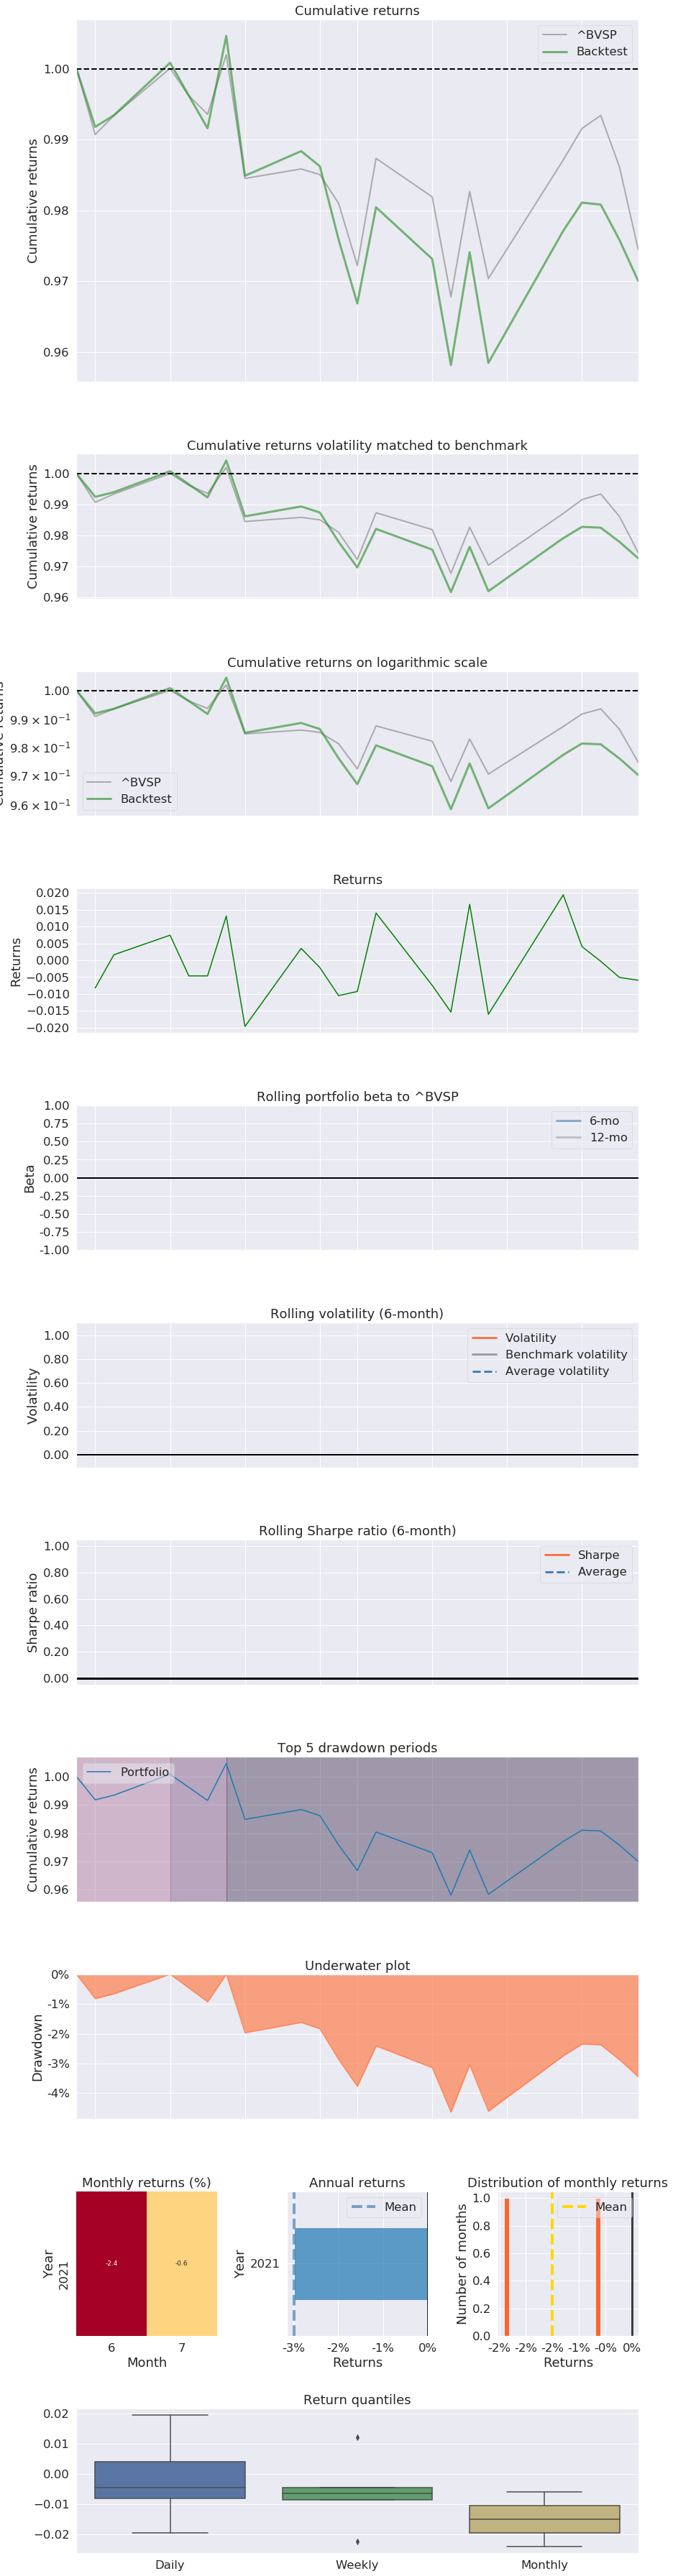

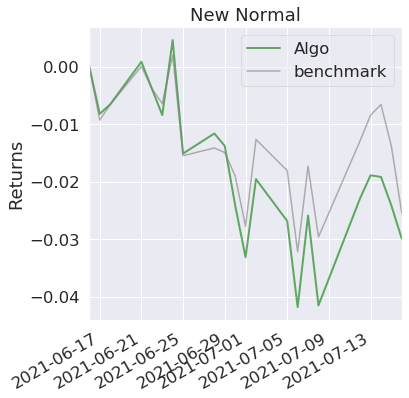

In [332]:

pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=ret_simples["^BVSP"])
